# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer") 

# Display the data table for preview
print(combined_data.head())
print(combined_data.columns)


  Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1  
Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')


In [4]:
# Checking the number of mice.
num_mice = combined_data["Mouse ID"].nunique()  
print(f"Number of unique mice: {num_mice}")

Number of unique mice: 249


In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = combined_data[combined_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
print("Duplicate mice based on Mouse ID and Timepoint:")    

Duplicate mice based on Mouse ID and Timepoint:


In [6]:
# Optional: Get all the data for the duplicate mouse ID.
print(duplicate_mice)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801                 0  
911           47.570392        

In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = combined_data.drop_duplicates(subset=["Mouse ID", "Timepoint"])
print(cleaned_data .head())

  Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1  


In [10]:
# Checking the number of mice in the clean DataFrame.
num_mice_cleaned = cleaned_data["Mouse ID"].nunique()
print(f"Number of unique mice after cleaning: {num_mice_cleaned}")  

Number of unique mice after cleaning: 249


## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

summary_stats = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    mean="mean",
    median="median",
    variance="var",
    std_dev="std",
    sem="sem"
).reset_index() 

# Display the summary statistics DataFrame
print(summary_stats)    

  Drug Regimen       mean     median   variance   std_dev       sem
0    Capomulin  40.675741  41.557809  24.947764  4.994774  0.329346
1     Ceftamin  52.591172  51.776157  39.290177  6.268188  0.469821
2    Infubinol  52.884795  51.820584  43.128684  6.567243  0.492236
3     Ketapril  55.235638  53.698743  68.553577  8.279709  0.603860
4     Naftisol  54.331565  52.509285  66.173479  8.134708  0.596466
5      Placebo  54.033581  52.288934  61.168083  7.821003  0.581331
6     Propriva  52.393463  50.909965  43.138803  6.568014  0.525862
7     Ramicane  40.216745  40.673236  23.486704  4.846308  0.320955
8     Stelasyn  54.233149  52.431737  59.450562  7.710419  0.573111
9    Zoniferol  53.236507  51.818479  48.533355  6.966589  0.516398


In [13]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

summary_stats_advanced = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    mean="mean",
    median="median",
    variance="var",
    std_dev="std",
    sem="sem"
).reset_index()

# Display the advanced summary statistics DataFrame
print(summary_stats_advanced)   

  Drug Regimen       mean     median   variance   std_dev       sem
0    Capomulin  40.675741  41.557809  24.947764  4.994774  0.329346
1     Ceftamin  52.591172  51.776157  39.290177  6.268188  0.469821
2    Infubinol  52.884795  51.820584  43.128684  6.567243  0.492236
3     Ketapril  55.235638  53.698743  68.553577  8.279709  0.603860
4     Naftisol  54.331565  52.509285  66.173479  8.134708  0.596466
5      Placebo  54.033581  52.288934  61.168083  7.821003  0.581331
6     Propriva  52.393463  50.909965  43.138803  6.568014  0.525862
7     Ramicane  40.216745  40.673236  23.486704  4.846308  0.320955
8     Stelasyn  54.233149  52.431737  59.450562  7.710419  0.573111
9    Zoniferol  53.236507  51.818479  48.533355  6.966589  0.516398


## Bar and Pie Charts

Text(0.5, 0, 'Drug Regimen')

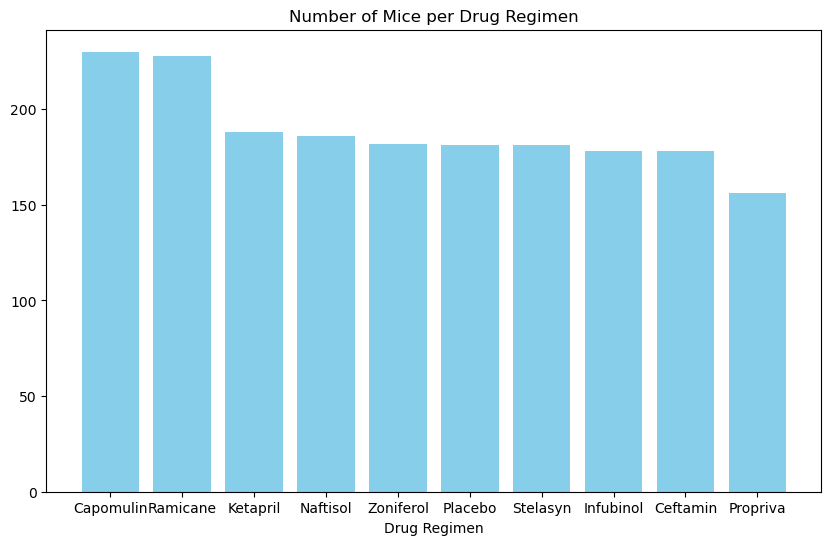

In [ ]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Set the figure size
plt.figure(figsize=(10, 6)) 
# Create a bar plot using the cleaned data
plt.bar(cleaned_data["Drug Regimen"].value_counts().index, cleaned_data["Drug Regimen"].value_counts().values, color='skyblue')
# Set the title and labels
plt.title("Number of Mice per Drug Regimen")
plt.xlabel("Drug Regimen")  

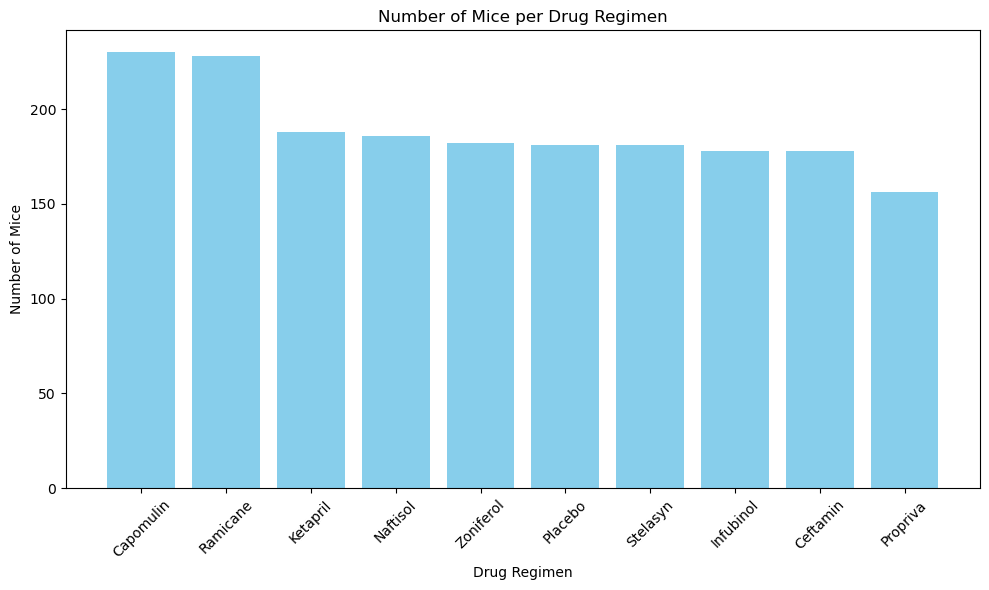

In [15]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Set the figure size
plt.figure(figsize=(10, 6))
# Create a bar plot using the cleaned data
plt.bar(cleaned_data["Drug Regimen"].value_counts().index, cleaned_data["Drug Regimen"].value_counts().values, color='skyblue') 
# Set the title and labels
plt.title("Number of Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels  
# Show the plot
plt.show()
    

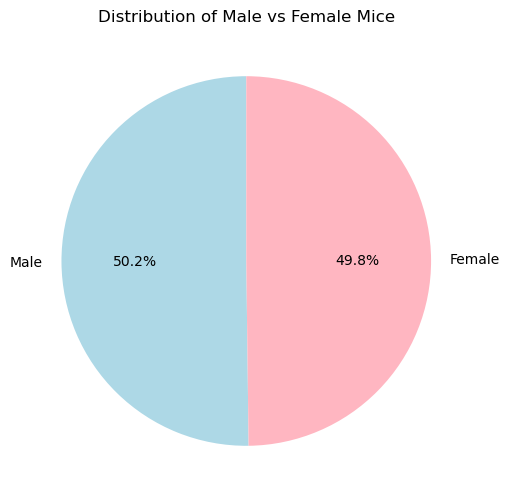

In [24]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

unique_mice = cleaned_data.drop_duplicates(subset=["Mouse ID"])

# Count the unique occurrences of each gender
gender_counts = unique_mice["Sex"].value_counts()

# Create a pie chart
plt.figure(figsize=(6,6))
gender_counts.plot(kind="pie", autopct="%1.1f%%", startangle=90, colors=["lightblue", "lightpink"])

# Formatting
plt.title("Distribution of Male vs Female Mice")
plt.ylabel("")  

# Show the chart
plt.show()

## Quartiles, Outliers and Boxplots

In [27]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Select the four treatment regimens
treatment_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"] 
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = cleaned_data.groupby("Mouse ID")["Timepoint"].max().reset_index()  

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_timepoint_data = pd.merge(last_timepoint, cleaned_data, on=["Mouse ID", "Timepoint"])
# Filter the DataFrame to include only the selected treatment regimens  
last_timepoint_data = last_timepoint_data[last_timepoint_data["Drug Regimen"].isin(treatment_regimens)]
# Display the last timepoint data for the selected treatment regimens
print(last_timepoint_data[["Mouse ID", "Drug Regimen", "Timepoint", "Tumor Volume (mm3)"]])


    Mouse ID Drug Regimen  Timepoint  Tumor Volume (mm3)
0       a203    Infubinol         45           67.973419
1       a251    Infubinol         45           65.525743
3       a275     Ceftamin         45           62.999356
6       a411     Ramicane         45           38.407618
7       a444     Ramicane         45           43.047543
..       ...          ...        ...                 ...
239     y769     Ceftamin         45           68.594745
240     y793    Capomulin         45           31.896238
241     y865     Ceftamin         45           64.729837
245     z578     Ramicane         45           30.638696
246     z581    Infubinol         45           62.754451

[100 rows x 4 columns]


In [29]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create an empty dictionary to store tumor volume data for each treatment
tumor_volumes = {}

# Loop through each drug and retrieve tumor volumes
for drug in treatment_regimens:
    tumor_volumes[drug] = mouse_data.loc[mouse_data["Drug Regimen"] == drug, "Tumor Volume (mm3)"]

# Create a DataFrame from the dictionary
tumor_df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in tumor_volumes.items()]))

# Calculate the IQR and determine potential outliers
for drug in treatment_regimens:
    quartiles = tumor_df[drug].quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    # Calculate the lower and upper bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)

    # Find potential outliers
    outliers = tumor_df[(tumor_df[drug] < lower_bound) | (tumor_df[drug] > upper_bound)][drug]

    print(f"{drug} potential outliers:")
    print(outliers)

Capomulin potential outliers:
Series([], Name: Capomulin, dtype: float64)
Ramicane potential outliers:
Series([], Name: Ramicane, dtype: float64)
Infubinol potential outliers:
Series([], Name: Infubinol, dtype: float64)
Ceftamin potential outliers:
Series([], Name: Ceftamin, dtype: float64)


C:\Users\olive\AppData\Local\Temp\ipykernel_18084\896931351.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(tumor_volumes, labels=treatment_regimens, patch_artist=True, boxprops=dict(facecolor='lightblue'))


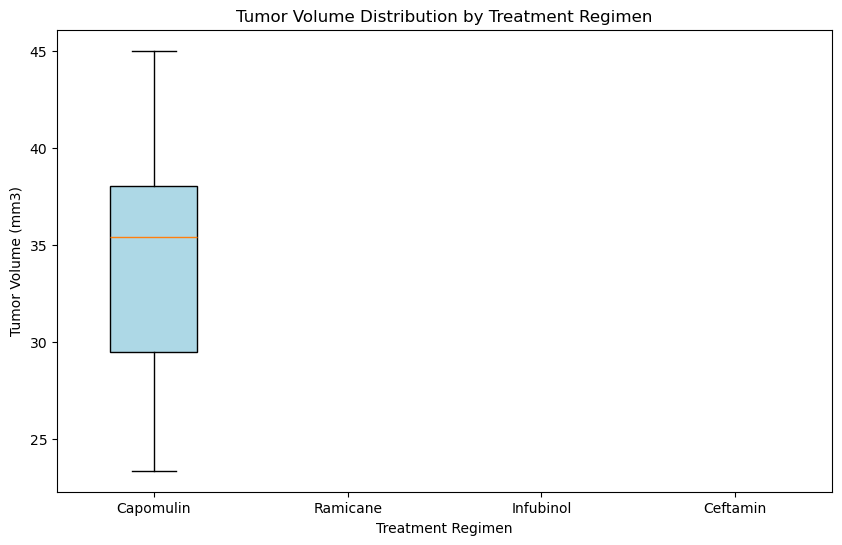

In [38]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.

# Ensure tumor_volumes is a list of lists, where each treatment group has its own list
tumor_volumes = [mouse_data.loc[mouse_data["Drug Regimen"] == drug, "Tumor Volume (mm3)"].tolist()
                 for drug in treatment_regimens]

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a box plot using the cleaned data
plt.boxplot(tumor_volumes, labels=treatment_regimens, patch_artist=True, boxprops=dict(facecolor='lightblue'))

# Set the title and labels
plt.title("Tumor Volume Distribution by Treatment Regimen")
plt.xlabel("Treatment Regimen")
plt.ylabel("Tumor Volume (mm3)")

# Show the plot
plt.show()

## Line and Scatter Plots

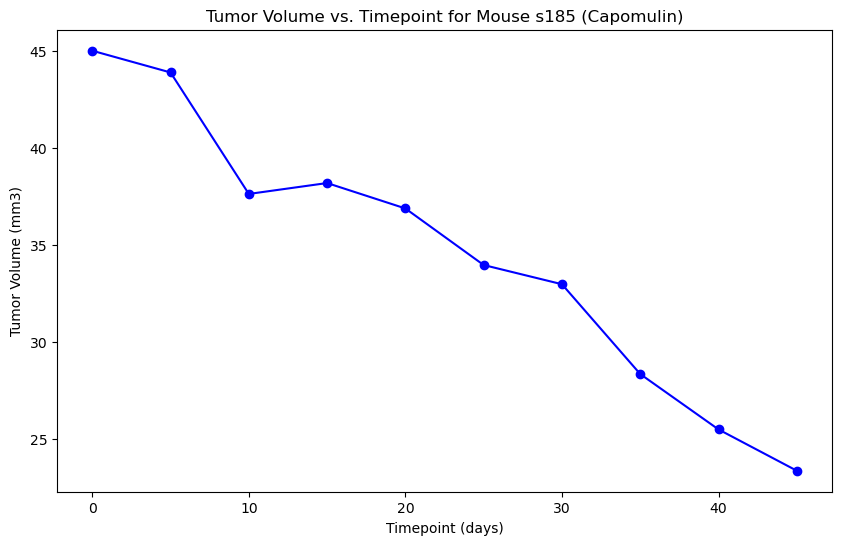

<Figure size 640x480 with 0 Axes>

In [18]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Select a mouse treated with Capomulin
mouse_id = cleaned_data.loc[cleaned_data["Drug Regimen"] == "Capomulin", "Mouse ID"].unique()[0]  # Get a mouse ID treated with Capomulin
# Filter the data for the selected mouse
mouse_data = cleaned_data[cleaned_data["Mouse ID"] == mouse_id]  # Get the data for the selected mouse
# Set the figure size
plt.figure(figsize=(10, 6))  # Set the figure size
# Create a line plot using the mouse data
plt.plot(mouse_data["Timepoint"], mouse_data["Tumor Volume (mm3)"], marker='o', color='blue')  # Create a line plot using the mouse data
# Set the title and labels
plt.title(f"Tumor Volume vs. Timepoint for Mouse {mouse_id} (Capomulin)")  # Set the title and labels
plt.xlabel("Timepoint (days)")  # Set the x-axis label
plt.ylabel("Tumor Volume (mm3)")  # Set the y-axis label
# Show the plot
plt.show()  # Show the plot
# Save the figure
plt.savefig("mouse_tumor_volume.png")  # Save the figure as a PNG file

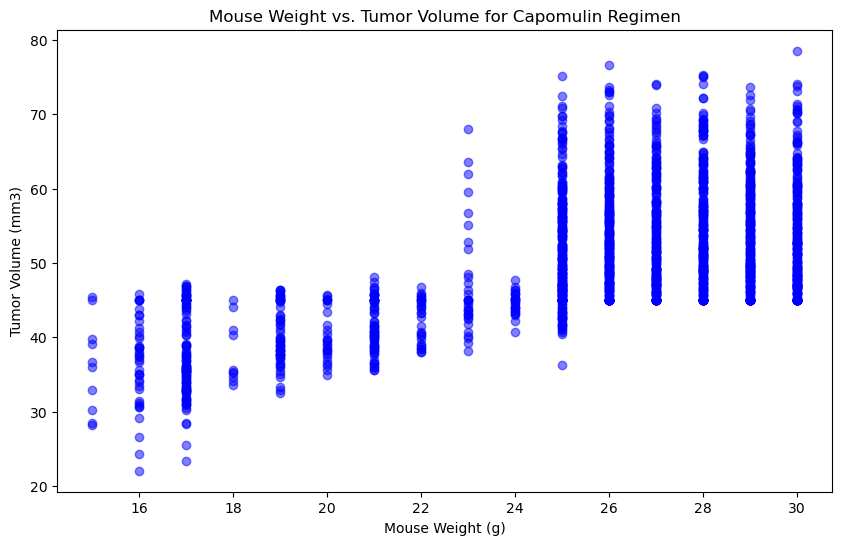

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Set the figure size
plt.figure(figsize=(10, 6))
# Create a scatter plot using the cleaned data
plt.scatter(cleaned_data["Weight (g)"], cleaned_data["Tumor Volume (mm3)"], color='blue', alpha=0.5)
# Set the title and labels
plt.title("Mouse Weight vs. Tumor Volume for Capomulin Regimen")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
# Show the plot
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


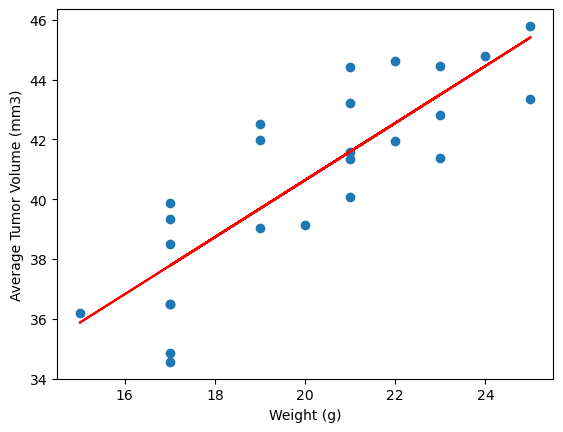

In [ ]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
